In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import roc_auc_score
import japanize_matplotlib

In [9]:
#データ読み込み
train = pd.read_csv("../dataset/train.csv")
test = pd.read_csv("../dataset/test.csv")
gender_submission = pd.read_csv("../dataset/gender_submission.csv")

#特徴量エンジニアリング
#train
t_train = train["Survived"]
train["FamilySize"] = train["SibSp"] + train["Parch"] 
x_train = train[["Pclass","Sex","Age","FamilySize","Fare","Embarked"]]
x_train["Sex"].replace(["male","female"],[0,1],inplace=True)
# Embarkedをonehot変換
Embarked = pd.get_dummies(x_train["Embarked"])
Embarked.replace([False,True],[0,1],inplace=True)
x_train = x_train.drop(columns=['Embarked'])
x_train = pd.concat([x_train,Embarked],axis = 1)
x_train.fillna(x_train.mean(), inplace=True)
#正規化
x_train = (x_train - x_train.mean()) / x_train.std()
x_train
#test
test["FamilySize"] = test["SibSp"] + test["Parch"] 
x_test = test[["Pclass","Sex","Age","FamilySize","Fare","Embarked"]]
x_test["Sex"].replace(["male","female"],[0,1],inplace=True)
# Embarkedをonehot変換
Embarked = pd.get_dummies(x_test["Embarked"])
Embarked.replace([False,True],[0,1],inplace=True)
x_test = x_test.drop(columns=['Embarked'])
x_test = pd.concat([x_test,Embarked],axis = 1)
x_test.fillna(x_test.mean(), inplace=True)
#正規化
x_test = (x_test - x_test.mean()) / x_test.std()
x_test

C:\Users\logihaal\AppData\Local\Temp\ipykernel_15028\2187756855.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_train["Sex"].replace(["male","female"],[0,1],inplace=True)
C:\Users\logihaal\AppData\Local\Temp\ipykernel_15028\2187756855.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x_tra

,Pclass,Sex,Age,FamilySize,Fare,C,Q,S
0,0.872436,-0.755024,0.334592,-0.552780,-0.497811,-0.567462,2.840354,-1.349059
1,0.872436,1.321292,1.323944,0.105516,-0.512660,-0.567462,-0.351227,0.739484
2,-0.315441,-0.755024,2.511166,-0.552780,-0.464532,-0.567462,2.840354,-1.349059
3,0.872436,-0.755024,-0.259019,-0.552780,-0.482888,-0.567462,-0.351227,0.739484
4,0.872436,1.321292,-0.654760,0.763813,-0.417971,-0.567462,-0.351227,0.739484
...,...,...,...,...,...,...,...,...
413,0.872436,-0.755024,0.000000,-0.552780,-0.493856,-0.567462,-0.351227,0.739484
414,-1.503319,1.321292,0.690758,-0.552780,1.312180,1.758018,-0.351227,-1.349059
415,0.872436,-0.755024,0.651184,-0.552780,-0.508183,-0.567462,-0.351227,0.739484
416,0.872436,-0.755024,0.000000,-0.552780,-0.493856,-0.567462,-0.351227,0.739484


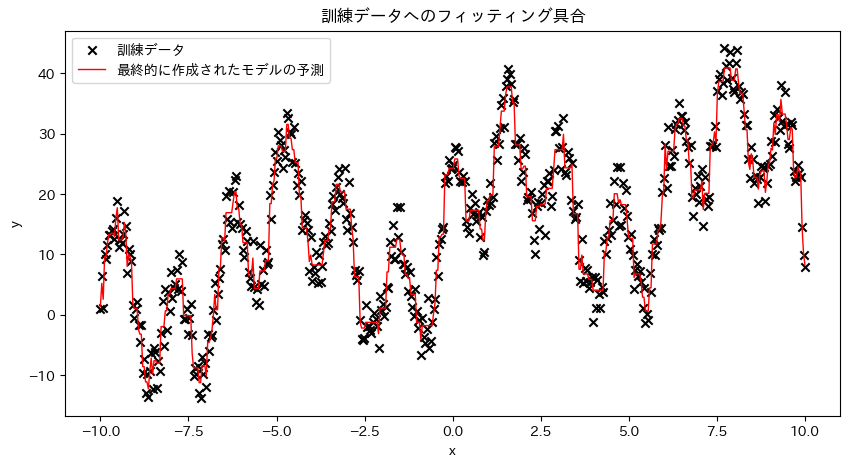

In [10]:
# 訓練データ
X = np.linspace(-10, 10, 500)[:, np.newaxis]
noise = np.random.rand(X.shape[0]) * 10

# 目的変数
y = (
    (np.sin(X).ravel() + np.cos(4 * X).ravel()) * 10
    + 10
    + np.linspace(-10, 10, 500)
    + noise
)

# 回帰モデルを作成
reg = GradientBoostingRegressor(
    n_estimators=50,
    learning_rate=0.5,
)
reg.fit(X, y)
y_pred = reg.predict(X)

# 訓練データへのフィッティング具合を確認する
plt.figure(figsize=(10, 5))
plt.scatter(X, y, c="k", marker="x", label="訓練データ")
plt.plot(X, y_pred, c="r", label="最終的に作成されたモデルの予測", linewidth=1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("訓練データへのフィッティング具合")
plt.legend()
plt.show()


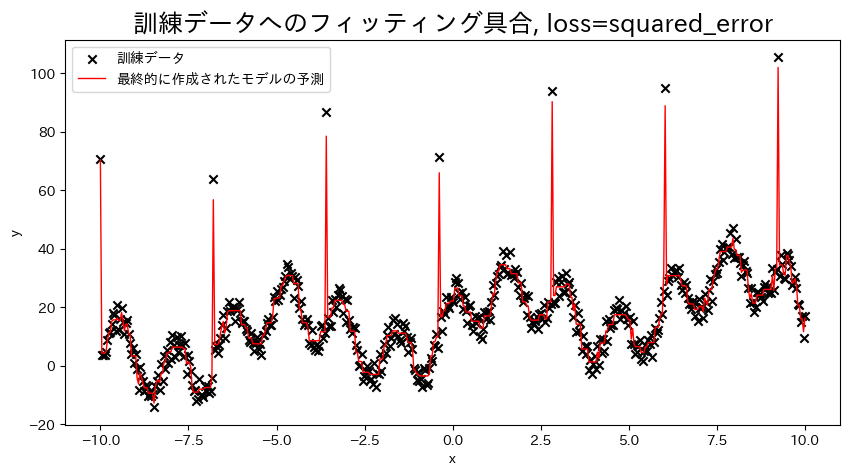

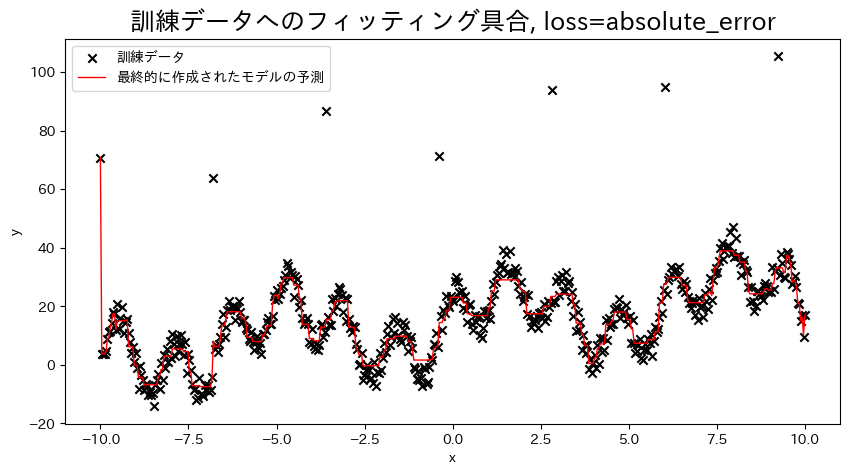

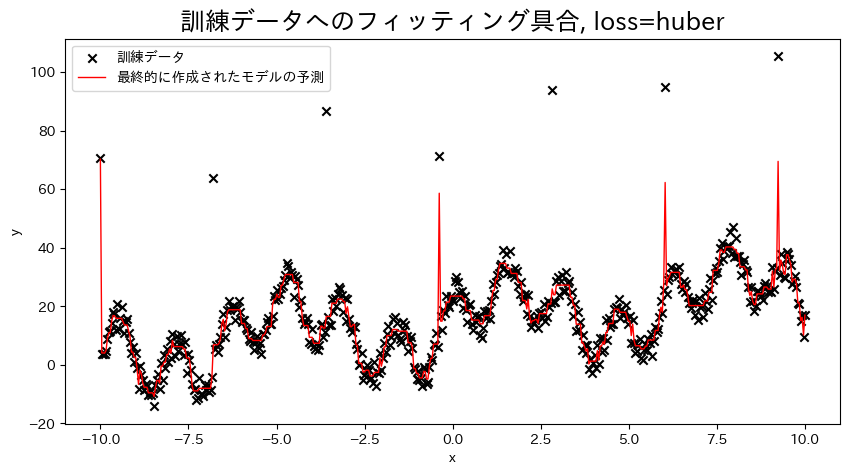

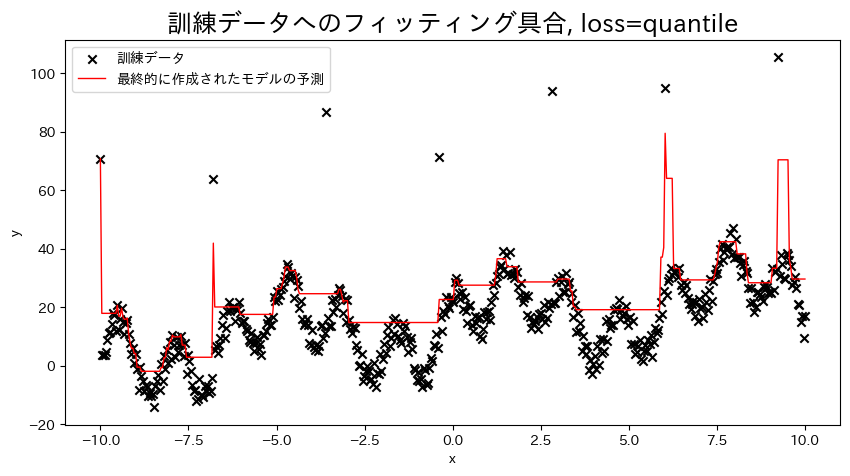

In [11]:
# 訓練データ
X = np.linspace(-10, 10, 500)[:, np.newaxis]

# 外れ値を用意
noise = np.random.rand(X.shape[0]) * 10
for i, ni in enumerate(noise):
    if i % 80 == 0:
        noise[i] = 70 + np.random.randint(-10, 10)

# 目的変数
y = (
    (np.sin(X).ravel() + np.cos(4 * X).ravel()) * 10
    + 10
    + np.linspace(-10, 10, 500)
    + noise
)

for loss in ["squared_error", "absolute_error", "huber", "quantile"]:
    # 回帰モデルを作成
    reg = GradientBoostingRegressor(
        n_estimators=50,
        learning_rate=0.5,
        loss=loss,
    )
    reg.fit(X, y)
    y_pred = reg.predict(X)

    # 訓練データへのフィッティング具合を確認する
    plt.figure(figsize=(10, 5))
    plt.scatter(X, y, c="k", marker="x", label="訓練データ")
    plt.plot(X, y_pred, c="r", label="最終的に作成されたモデルの予測", linewidth=1)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"訓練データへのフィッティング具合, loss={loss}", fontsize=18)
    plt.legend()
    plt.show()


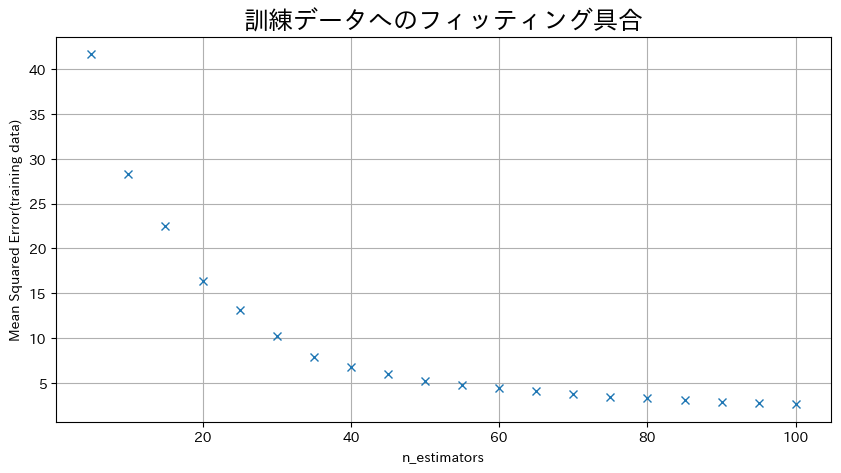

In [12]:
from sklearn.metrics import mean_squared_error as MSE

# 訓練データ
X = np.linspace(-10, 10, 500)[:, np.newaxis]
noise = np.random.rand(X.shape[0]) * 10

# 目的変数
y = (
    (np.sin(X).ravel() + np.cos(4 * X).ravel()) * 10
    + 10
    + np.linspace(-10, 10, 500)
    + noise
)


# n_estimatorsを変えてモデルを作成してみる
n_estimators_list = [(i + 1) * 5 for i in range(20)]
mses = []
for n_estimators in n_estimators_list:
    # 回帰モデルを作成
    reg = GradientBoostingRegressor(
        n_estimators=n_estimators,
        learning_rate=0.3,
    )
    reg.fit(X, y)
    y_pred = reg.predict(X)
    mses.append(MSE(y, y_pred))

# n_estimatorsを変えた時のmean_squared_errorをプロット
plt.figure(figsize=(10, 5))
plt.plot(n_estimators_list, mses, "x")
plt.xlabel("n_estimators")
plt.ylabel("Mean Squared Error(training data)")
plt.title(f"訓練データへのフィッティング具合", fontsize=18)
plt.grid()
plt.show()


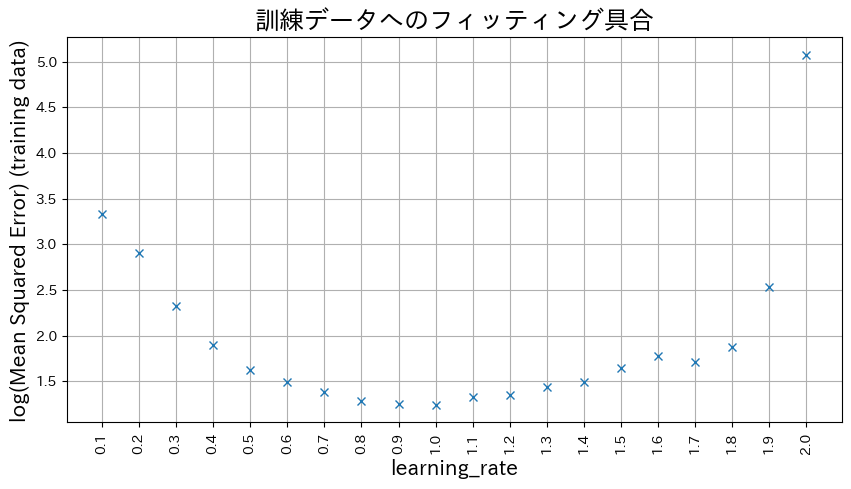

In [13]:
# n_estimatorsを変えてモデルを作成してみる
learning_rate_list = [np.round(0.1 * (i + 1), 1) for i in range(20)]
mses = []
for learning_rate in learning_rate_list:
    # 回帰モデルを作成
    reg = GradientBoostingRegressor(
        n_estimators=30,
        learning_rate=learning_rate,
    )
    reg.fit(X, y)
    y_pred = reg.predict(X)
    mses.append(np.log(MSE(y, y_pred)))

# n_estimatorsを変えた時のmean_squared_errorをプロット
plt.figure(figsize=(10, 5))
plt_index = [i for i in range(len(learning_rate_list))]
plt.plot(plt_index, mses, "x")
plt.xticks(plt_index, learning_rate_list, rotation=90)
plt.xlabel("learning_rate", fontsize=15)
plt.ylabel("log(Mean Squared Error) (training data)", fontsize=15)
plt.title(f"訓練データへのフィッティング具合", fontsize=18)
plt.grid()
plt.show()


In [16]:
# 回帰モデルを作成
reg = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.9,
    loss='huber',
)
reg.fit(x_train, t_train)
t_pred = reg.predict(x_train)
ab_clf_score = roc_auc_score(t_train, t_pred)

ab_clf_score

0.9819821259280562

In [17]:
# 回帰モデルを作成
reg = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.9,
    loss='huber',
)
reg.fit(x_train, t_train)
t_test = reg.predict(x_test)

In [18]:
t_test = np.where(t_test >= 0.5, 1, 0)

In [19]:
x_test["Survived"] = t_test
t_output = x_test["Survived"]
t_output.index = t_output.index + 892
t_output.index.rename('PassengerId', inplace=True)
# DataFrameをCSVに出力
t_output.to_csv("output_GradientBoosting.csv")